In [3]:
import pandas as pd

In [48]:
path = './data/18-10-29_names.csv'

In [49]:
df = pd.read_csv(path, sep='\\')

In [50]:
df = df.rename(columns={"frame.time_relative": "time",
                        "_ws.col.Protocol": "protocol",
                        "frame.len": "len",
                        "_ws.col.Info": "info"})

In [51]:
df.head()

,time,eth.src,eth.src_resolved,eth.dst,eth.dst_resolved,ip.src,ip.src_host,ip.dst,ip.dst_host,protocol,len,info
0,0.000000,ec:1a:59:83:28:11,BelkinIn_83:28:11,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,192.168.1.165,192.168.1.165,192.168.1.1,192.168.1.1,DNS,75,Standard query 0x00e2 A tunnel.xbcs.net
1,0.002010,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,ec:1a:59:83:28:11,BelkinIn_83:28:11,192.168.1.1,192.168.1.1,192.168.1.165,192.168.1.165,DNS,91,Standard query response 0x00e2 A tunnel.xbcs.n...
2,0.002049,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,ec:1a:59:83:28:11,BelkinIn_83:28:11,192.168.1.1,192.168.1.1,192.168.1.165,192.168.1.165,DNS,91,Standard query response 0x00e2 A tunnel.xbcs.n...
3,0.009122,ec:1a:59:83:28:11,BelkinIn_83:28:11,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,192.168.1.165,192.168.1.165,174.129.217.97,174.129.217.97,TCP,74,4833 → 3478 [SYN] Seq=0 Win=5840 Len=0 MSS=146...
4,0.172947,30:8c:fb:2f:e4:b2,Dropcam_2f:e4:b2,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,192.168.1.106,192.168.1.106,35.188.0.57,35.188.0.57,TLSv1,156,"Application Data, Application Data"


<AxesSubplot:>

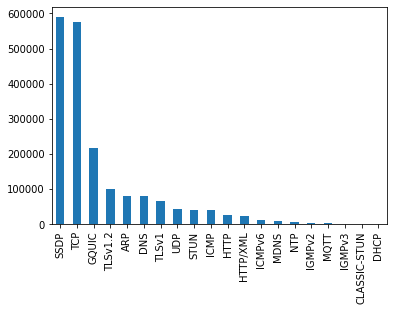

In [52]:
df['protocol'].value_counts()[:20].plot(kind='bar')

<AxesSubplot:>

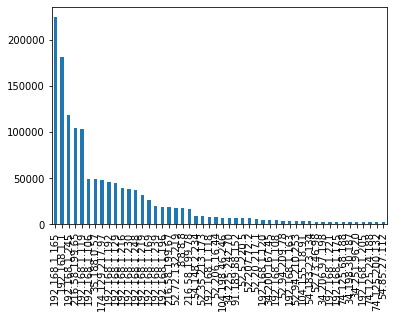

In [53]:
df['ip.src'].value_counts()[:50].plot(kind='bar')

<AxesSubplot:>

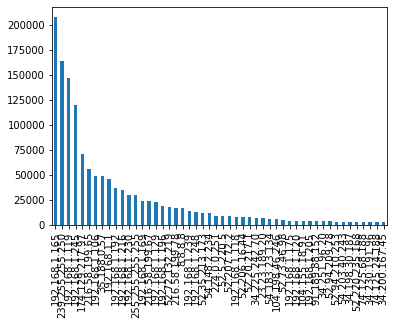

In [54]:
df['ip.dst'].value_counts()[:50].plot(kind='bar')

<AxesSubplot:>

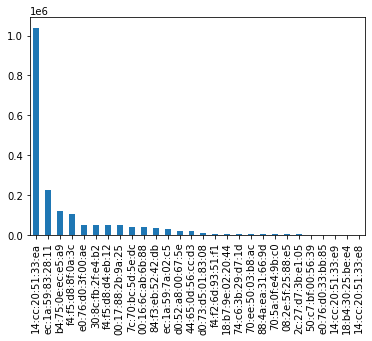

In [55]:
df['eth.src'].value_counts()[:50].plot(kind='bar')

<AxesSubplot:>

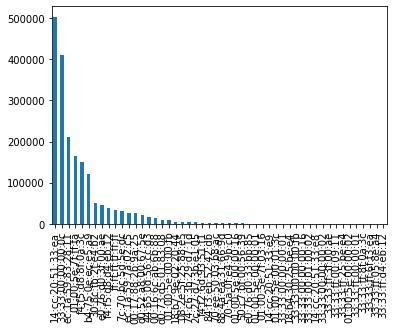

In [56]:
df['eth.dst'].value_counts()[:50].plot(kind='bar')

<AxesSubplot:>

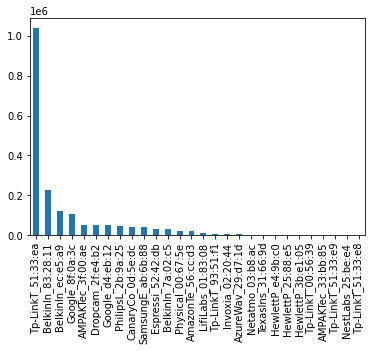

In [62]:
df['eth.src_resolved'].value_counts()[:50].plot(kind='bar')

<AxesSubplot:>

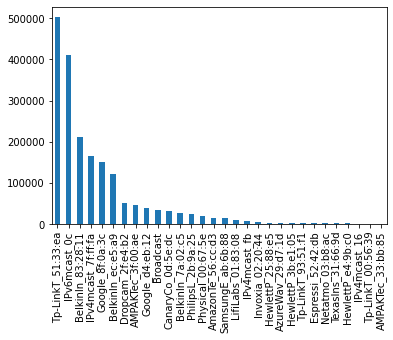

In [64]:
df['eth.dst_resolved'].value_counts()[:30].plot(kind='bar')

Next: check the packet that raised a warning when running tshark (1479336)

mac name resolution

### Packets that raise a warning when running tshark

In [45]:
df.iloc[1479335]

time                                                  66329.1
eth.src                                     00:17:88:2b:9a:25
eth.dst                                     14:cc:20:51:33:ea
ip.src                                          192.168.1.129
ip.dst                                          130.211.67.12
protocol                                                 HTTP
len                                                       767
info        POST /bridges/fullconfig?sso=332e252d3b35d28a7...
Name: 1479335, dtype: object

In [47]:
df.iloc[1479335]['info']

'POST /bridges/fullconfig?sso=332e252d3b35d28a7e76a9faee142223e84f6578bd541b2b77a392a0ded4ef161b717eaf66da2b1256b93213e31364fedc23c944472c081832f02878b81abcd8acf21eb652373b6d2049571000c64cad080547f708e8146d3f543855fd6b1fe01bd45b0612666792ce63247e2f232b62bb15213d2999dc985e39ce6166ad61e59c31&i=f9cb1ac3c5e1e68956445eccab284cf2&auth=8f553d46f86ebc378cd53d0965c27a096a3c3c8c HTTP/1.1 [Dissector bug, protocol HTTP: epan/packet.c:761: failed assertion saved_layers_len < 500"][Dissector bug, protocol HTTP: epan/packet.c:761: failed assertion "saved_layers_len < 500"]"'

Seems like the info column is too long (>500)